In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import model
import training
import reg_tech
import testing
import dataloaders

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

bn_Net = model.bn_model()
gbn_Net = model.gbn_model()

# train_loader, test_loader = dataloaders.data_loaders(256)

In [3]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

loss_dict = {'l1+bn': [],
               'l2+bn': [],
               'l1+l2+bn': [],
               'gbn': [],
               'l1+l2+gbn': []}

In [4]:
experiments = {'l1+bn': {
                        'model': bn_Net,
                        'train': training.l1_train,
                        'test': testing.l1_test,
                        'optimizer': reg_tech.l1_optimizer,
                        'batch_size': 128}, 
               'l2+bn': {
                        'model': bn_Net,
                        'train': training.l2_train,
                        'test': testing.l2_test,
                        'optimizer': reg_tech.l2_optimizer,
                        'batch_size': 128},
               'l1+l2+bn': {
                        'model': bn_Net,
                        'train': training.l1_l2_train,
                        'test': testing.l1_l2_test,
                        'optimizer': reg_tech.l2_optimizer,
                        'batch_size': 128},
               
               'gbn': {
                        'model': gbn_Net,
                        'train': training.l2_train,
                        'test': testing.l2_test,
                        'optimizer': reg_tech.nil_optimizer,
                        'batch_size': 256},
               
               'l1+l2+gbn': {
                        'model': gbn_Net,
                        'train': training.l1_l2_train,
                        'test': testing.l1_l2_test,
                        'optimizer': reg_tech.l2_optimizer,
                        'batch_size': 256}
               }

In [5]:
epochs = 25
for name, parts in experiments.items():
  print('\n',name)
  Net = parts['model']

  model = Net().to(device)
  train_loader, test_loader = dataloaders.data_loaders(parts['batch_size'])
  train = parts['train'](model)
  test = parts['test'](model)
  optimizer = parts['optimizer'](model)
  for epoch in range(1, epochs+1):
    train(model, device, train_loader, optimizer, epoch)
    test_loss= test(model, device, test_loader, name)
    loss_dict[name].append(float(test_loss))

    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))


 l1+bn


  0%|          | 0/469 [00:00<?, ?it/s]/content/model.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.4978242814540863 Batch_id=468 Accuracy=89.80: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0900, Accuracy: 9729/10000 (97.29%)

Epoch-1 lr: 0.01


Loss=0.3740345239639282 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0537, Accuracy: 9836/10000 (98.36%)

Epoch-2 lr: 0.01


Loss=0.43282121419906616 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0482, Accuracy: 9856/10000 (98.56%)

Epoch-3 lr: 0.01


Loss=0.3892041742801666 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0423, Accuracy: 9865/10000 (98.65%)

Epoch-4 lr: 0.01


Loss=0.24481938779354095 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0620, Accuracy: 9818/10000 (98.18%)

Epoch-5 lr: 0.01


Loss=0.2762303650379181 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0387, Accuracy: 9873/10000 (98.73%)

Epoch-6 lr: 0.01


Loss=0.3039909601211548 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:22<00:00, 20.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9897/10000 (98.97%)

Epoch-7 lr: 0.01


Loss=0.3040832579135895 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:21<00:00, 22.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0606, Accuracy: 9813/10000 (98.13%)

Epoch-8 lr: 0.01


Loss=0.23453263938426971 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9899/10000 (98.99%)

Epoch-9 lr: 0.01


Loss=0.36039185523986816 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0438, Accuracy: 9872/10000 (98.72%)

Epoch-10 lr: 0.01


Loss=0.29144287109375 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:21<00:00, 21.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9896/10000 (98.96%)

Epoch-11 lr: 0.01


Loss=0.37649500370025635 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0413, Accuracy: 9882/10000 (98.82%)

Epoch-12 lr: 0.01


Loss=0.32475772500038147 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9881/10000 (98.81%)

Epoch-13 lr: 0.01


Loss=0.24736565351486206 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:21<00:00, 21.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0511, Accuracy: 9844/10000 (98.44%)

Epoch-14 lr: 0.01


Loss=0.4589497447013855 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:21<00:00, 21.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0469, Accuracy: 9864/10000 (98.64%)

Epoch-15 lr: 0.01


Loss=0.2202213555574417 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0389, Accuracy: 9878/10000 (98.78%)

Epoch-16 lr: 0.01


Loss=0.4074743092060089 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:21<00:00, 21.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0354, Accuracy: 9896/10000 (98.96%)

Epoch-17 lr: 0.01


Loss=0.22412006556987762 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9900/10000 (99.00%)

Epoch-18 lr: 0.01


Loss=0.2159259021282196 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9917/10000 (99.17%)

Epoch-19 lr: 0.01


Loss=0.5199143886566162 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 9890/10000 (98.90%)

Epoch-20 lr: 0.01


Loss=0.41892340779304504 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9910/10000 (99.10%)

Epoch-21 lr: 0.01


Loss=0.24411261081695557 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0349, Accuracy: 9885/10000 (98.85%)

Epoch-22 lr: 0.01


Loss=0.4641704559326172 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9883/10000 (98.83%)

Epoch-23 lr: 0.01


Loss=0.28788068890571594 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9909/10000 (99.09%)

Epoch-24 lr: 0.01


Loss=0.21899563074111938 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0442, Accuracy: 9867/10000 (98.67%)

Epoch-25 lr: 0.01

 l2+bn


Loss=0.10555730015039444 Batch_id=468 Accuracy=89.80: 100%|██████████| 469/469 [00:19<00:00, 24.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0995, Accuracy: 9812/10000 (98.12%)

Epoch-1 lr: 0.01


Loss=0.05744815990328789 Batch_id=468 Accuracy=97.37: 100%|██████████| 469/469 [00:19<00:00, 23.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1590, Accuracy: 9627/10000 (96.27%)

Epoch-2 lr: 0.01


Loss=0.1216009184718132 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:19<00:00, 23.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1078, Accuracy: 9847/10000 (98.47%)

Epoch-3 lr: 0.01


Loss=0.10949636250734329 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:19<00:00, 24.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0944, Accuracy: 9814/10000 (98.14%)

Epoch-4 lr: 0.01


Loss=0.11177867650985718 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:19<00:00, 24.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1223, Accuracy: 9735/10000 (97.35%)

Epoch-5 lr: 0.01


Loss=0.09760139137506485 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:19<00:00, 24.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1034, Accuracy: 9804/10000 (98.04%)

Epoch-6 lr: 0.01


Loss=0.10186166316270828 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:18<00:00, 25.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1209, Accuracy: 9742/10000 (97.42%)

Epoch-7 lr: 0.01


Loss=0.12995697557926178 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:19<00:00, 23.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1123, Accuracy: 9782/10000 (97.82%)

Epoch-8 lr: 0.01


Loss=0.07322881370782852 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:19<00:00, 23.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1263, Accuracy: 9729/10000 (97.29%)

Epoch-9 lr: 0.01


Loss=0.09729132801294327 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:19<00:00, 23.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1118, Accuracy: 9786/10000 (97.86%)

Epoch-10 lr: 0.01


Loss=0.10971028357744217 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:20<00:00, 23.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1597, Accuracy: 9647/10000 (96.47%)

Epoch-11 lr: 0.01


Loss=0.14607244729995728 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 23.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0998, Accuracy: 9786/10000 (97.86%)

Epoch-12 lr: 0.01


Loss=0.0935835912823677 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1011, Accuracy: 9762/10000 (97.62%)

Epoch-13 lr: 0.01


Loss=0.06415707617998123 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:19<00:00, 23.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0758, Accuracy: 9867/10000 (98.67%)

Epoch-14 lr: 0.01


Loss=0.12376290559768677 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:20<00:00, 23.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0911, Accuracy: 9839/10000 (98.39%)

Epoch-15 lr: 0.01


Loss=0.06573956459760666 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:19<00:00, 23.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0993, Accuracy: 9793/10000 (97.93%)

Epoch-16 lr: 0.01


Loss=0.1038297638297081 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:20<00:00, 23.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0811, Accuracy: 9818/10000 (98.18%)

Epoch-17 lr: 0.01


Loss=0.08792457729578018 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:19<00:00, 24.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1601, Accuracy: 9625/10000 (96.25%)

Epoch-18 lr: 0.01


Loss=0.06198188662528992 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:19<00:00, 23.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0948, Accuracy: 9805/10000 (98.05%)

Epoch-19 lr: 0.01


Loss=0.12425131350755692 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:19<00:00, 24.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0831, Accuracy: 9845/10000 (98.45%)

Epoch-20 lr: 0.01


Loss=0.14234744012355804 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:19<00:00, 23.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0940, Accuracy: 9770/10000 (97.70%)

Epoch-21 lr: 0.01


Loss=0.08915560692548752 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 23.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0795, Accuracy: 9831/10000 (98.31%)

Epoch-22 lr: 0.01


Loss=0.14843891561031342 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:18<00:00, 24.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1661, Accuracy: 9580/10000 (95.80%)

Epoch-23 lr: 0.01


Loss=0.09173309803009033 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:19<00:00, 23.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0839, Accuracy: 9846/10000 (98.46%)

Epoch-24 lr: 0.01


Loss=0.0942378118634224 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:19<00:00, 23.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1100, Accuracy: 9765/10000 (97.65%)

Epoch-25 lr: 0.01

 l1+l2+bn


Loss=0.3343367576599121 Batch_id=468 Accuracy=91.70: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1148, Accuracy: 9734/10000 (97.34%)

Epoch-1 lr: 0.01


Loss=0.2956691384315491 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:21<00:00, 22.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1296, Accuracy: 9697/10000 (96.97%)

Epoch-2 lr: 0.01


Loss=0.46433329582214355 Batch_id=468 Accuracy=97.32: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1358, Accuracy: 9621/10000 (96.21%)

Epoch-3 lr: 0.01


Loss=0.35413050651550293 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:21<00:00, 21.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0802, Accuracy: 9830/10000 (98.30%)

Epoch-4 lr: 0.01


Loss=0.3875477910041809 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1472, Accuracy: 9562/10000 (95.62%)

Epoch-5 lr: 0.01


Loss=0.2571539282798767 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:20<00:00, 22.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0971, Accuracy: 9777/10000 (97.77%)

Epoch-6 lr: 0.01


Loss=0.3517729640007019 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1011, Accuracy: 9778/10000 (97.78%)

Epoch-7 lr: 0.01


Loss=0.3423856496810913 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0824, Accuracy: 9787/10000 (97.87%)

Epoch-8 lr: 0.01


Loss=0.2686559557914734 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0660, Accuracy: 9838/10000 (98.38%)

Epoch-9 lr: 0.01


Loss=0.3915359377861023 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9865/10000 (98.65%)

Epoch-10 lr: 0.01


Loss=0.27542999386787415 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:22<00:00, 20.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1301, Accuracy: 9629/10000 (96.29%)

Epoch-11 lr: 0.01


Loss=0.35696670413017273 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0744, Accuracy: 9834/10000 (98.34%)

Epoch-12 lr: 0.01


Loss=0.3351339101791382 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:21<00:00, 21.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0877, Accuracy: 9770/10000 (97.70%)

Epoch-13 lr: 0.01


Loss=0.2780618965625763 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:21<00:00, 21.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0736, Accuracy: 9800/10000 (98.00%)

Epoch-14 lr: 0.01


Loss=0.3837302625179291 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:21<00:00, 21.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1030, Accuracy: 9758/10000 (97.58%)

Epoch-15 lr: 0.01


Loss=0.31787168979644775 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:21<00:00, 22.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1202, Accuracy: 9703/10000 (97.03%)

Epoch-16 lr: 0.01


Loss=0.44752800464630127 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:22<00:00, 21.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1177, Accuracy: 9671/10000 (96.71%)

Epoch-17 lr: 0.01


Loss=0.3857569098472595 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:22<00:00, 21.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1021, Accuracy: 9713/10000 (97.13%)

Epoch-18 lr: 0.01


Loss=0.2986372709274292 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:22<00:00, 21.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1058, Accuracy: 9698/10000 (96.98%)

Epoch-19 lr: 0.01


Loss=0.3606414198875427 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:21<00:00, 22.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1478, Accuracy: 9605/10000 (96.05%)

Epoch-20 lr: 0.01


Loss=0.3899042010307312 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0756, Accuracy: 9818/10000 (98.18%)

Epoch-21 lr: 0.01


Loss=0.2642361521720886 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:21<00:00, 22.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1312, Accuracy: 9654/10000 (96.54%)

Epoch-22 lr: 0.01


Loss=0.618598997592926 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:21<00:00, 21.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1298, Accuracy: 9660/10000 (96.60%)

Epoch-23 lr: 0.01


Loss=0.2656155824661255 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:21<00:00, 21.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1495, Accuracy: 9570/10000 (95.70%)

Epoch-24 lr: 0.01


Loss=0.46516090631484985 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.1194, Accuracy: 9667/10000 (96.67%)

Epoch-25 lr: 0.01

 gbn


/content/model.py:90: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.129734605550766 Batch_id=234 Accuracy=86.57: 100%|██████████| 235/235 [00:17<00:00, 13.33it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0951, Accuracy: 9769/10000 (97.69%)

Epoch-1 lr: 0.01


Loss=0.040912073105573654 Batch_id=234 Accuracy=97.54: 100%|██████████| 235/235 [00:17<00:00, 13.64it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0606, Accuracy: 9836/10000 (98.36%)

Epoch-2 lr: 0.01


Loss=0.07175040245056152 Batch_id=234 Accuracy=98.17: 100%|██████████| 235/235 [00:16<00:00, 14.34it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0496, Accuracy: 9847/10000 (98.47%)

Epoch-3 lr: 0.01


Loss=0.06731117516756058 Batch_id=234 Accuracy=98.42: 100%|██████████| 235/235 [00:16<00:00, 14.09it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9901/10000 (99.01%)

Epoch-4 lr: 0.01


Loss=0.012250981293618679 Batch_id=234 Accuracy=98.56: 100%|██████████| 235/235 [00:17<00:00, 13.70it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 9888/10000 (98.88%)

Epoch-5 lr: 0.01


Loss=0.039969924837350845 Batch_id=234 Accuracy=98.71: 100%|██████████| 235/235 [00:17<00:00, 13.20it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9894/10000 (98.94%)

Epoch-6 lr: 0.01


Loss=0.03733603283762932 Batch_id=234 Accuracy=98.86: 100%|██████████| 235/235 [00:16<00:00, 14.32it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9906/10000 (99.06%)

Epoch-7 lr: 0.01


Loss=0.07725191861391068 Batch_id=234 Accuracy=98.85: 100%|██████████| 235/235 [00:16<00:00, 14.45it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9907/10000 (99.07%)

Epoch-8 lr: 0.01


Loss=0.01718512736260891 Batch_id=234 Accuracy=98.92: 100%|██████████| 235/235 [00:16<00:00, 13.90it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9917/10000 (99.17%)

Epoch-9 lr: 0.01


Loss=0.026313206180930138 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [00:17<00:00, 13.16it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 9907/10000 (99.07%)

Epoch-10 lr: 0.01


Loss=0.01918061263859272 Batch_id=234 Accuracy=99.05: 100%|██████████| 235/235 [00:17<00:00, 13.13it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9916/10000 (99.16%)

Epoch-11 lr: 0.01


Loss=0.03594594821333885 Batch_id=234 Accuracy=99.16: 100%|██████████| 235/235 [00:17<00:00, 13.22it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9913/10000 (99.13%)

Epoch-12 lr: 0.01


Loss=0.04526903107762337 Batch_id=234 Accuracy=99.14: 100%|██████████| 235/235 [00:16<00:00, 13.83it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9919/10000 (99.19%)

Epoch-13 lr: 0.01


Loss=0.024655668064951897 Batch_id=234 Accuracy=99.17: 100%|██████████| 235/235 [00:17<00:00, 13.54it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9927/10000 (99.27%)

Epoch-14 lr: 0.01


Loss=0.06619096547365189 Batch_id=234 Accuracy=99.23: 100%|██████████| 235/235 [00:17<00:00, 13.65it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9917/10000 (99.17%)

Epoch-15 lr: 0.01


Loss=0.019493216648697853 Batch_id=234 Accuracy=99.20: 100%|██████████| 235/235 [00:18<00:00, 12.94it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9909/10000 (99.09%)

Epoch-16 lr: 0.01


Loss=0.07150948792695999 Batch_id=234 Accuracy=99.22: 100%|██████████| 235/235 [00:17<00:00, 13.82it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 9926/10000 (99.26%)

Epoch-17 lr: 0.01


Loss=0.01809520460665226 Batch_id=234 Accuracy=99.29: 100%|██████████| 235/235 [00:17<00:00, 13.71it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9930/10000 (99.30%)

Epoch-18 lr: 0.01


Loss=0.0033863510470837355 Batch_id=234 Accuracy=99.35: 100%|██████████| 235/235 [00:17<00:00, 13.32it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

Epoch-19 lr: 0.01


Loss=0.06199672445654869 Batch_id=234 Accuracy=99.31: 100%|██████████| 235/235 [00:17<00:00, 13.74it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9927/10000 (99.27%)

Epoch-20 lr: 0.01


Loss=0.09906654804944992 Batch_id=234 Accuracy=99.34: 100%|██████████| 235/235 [00:18<00:00, 12.80it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

Epoch-21 lr: 0.01


Loss=0.011046458035707474 Batch_id=234 Accuracy=99.33: 100%|██████████| 235/235 [00:17<00:00, 13.06it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9914/10000 (99.14%)

Epoch-22 lr: 0.01


Loss=0.024832524359226227 Batch_id=234 Accuracy=99.44: 100%|██████████| 235/235 [00:17<00:00, 13.59it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

Epoch-23 lr: 0.01


Loss=0.02707000821828842 Batch_id=234 Accuracy=99.39: 100%|██████████| 235/235 [00:17<00:00, 13.53it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9919/10000 (99.19%)

Epoch-24 lr: 0.01


Loss=0.002736794762313366 Batch_id=234 Accuracy=99.37: 100%|██████████| 235/235 [00:17<00:00, 13.47it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9918/10000 (99.18%)

Epoch-25 lr: 0.01

 l1+l2+gbn


Loss=0.4545902609825134 Batch_id=234 Accuracy=90.04: 100%|██████████| 235/235 [00:18<00:00, 12.57it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0917, Accuracy: 9804/10000 (98.04%)

Epoch-1 lr: 0.01


Loss=0.27720704674720764 Batch_id=234 Accuracy=97.97: 100%|██████████| 235/235 [00:18<00:00, 12.73it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0812, Accuracy: 9813/10000 (98.13%)

Epoch-2 lr: 0.01


Loss=0.3262949585914612 Batch_id=234 Accuracy=98.15: 100%|██████████| 235/235 [00:18<00:00, 12.83it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0911, Accuracy: 9776/10000 (97.76%)

Epoch-3 lr: 0.01


Loss=0.2989465296268463 Batch_id=234 Accuracy=98.35: 100%|██████████| 235/235 [00:18<00:00, 12.94it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.1975, Accuracy: 9460/10000 (94.60%)

Epoch-4 lr: 0.01


Loss=0.19503796100616455 Batch_id=234 Accuracy=98.25: 100%|██████████| 235/235 [00:18<00:00, 12.73it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0823, Accuracy: 9839/10000 (98.39%)

Epoch-5 lr: 0.01


Loss=0.2677040696144104 Batch_id=234 Accuracy=98.31: 100%|██████████| 235/235 [00:18<00:00, 12.93it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0798, Accuracy: 9775/10000 (97.75%)

Epoch-6 lr: 0.01


Loss=0.2769460678100586 Batch_id=234 Accuracy=98.34: 100%|██████████| 235/235 [00:17<00:00, 13.13it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0871, Accuracy: 9803/10000 (98.03%)

Epoch-7 lr: 0.01


Loss=0.29706326127052307 Batch_id=234 Accuracy=98.34: 100%|██████████| 235/235 [00:17<00:00, 13.07it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0622, Accuracy: 9862/10000 (98.62%)

Epoch-8 lr: 0.01


Loss=0.22503431141376495 Batch_id=234 Accuracy=98.28: 100%|██████████| 235/235 [00:17<00:00, 13.31it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0837, Accuracy: 9781/10000 (97.81%)

Epoch-9 lr: 0.01


Loss=0.26322585344314575 Batch_id=234 Accuracy=98.30: 100%|██████████| 235/235 [00:17<00:00, 13.13it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0674, Accuracy: 9851/10000 (98.51%)

Epoch-10 lr: 0.01


Loss=0.20418953895568848 Batch_id=234 Accuracy=98.46: 100%|██████████| 235/235 [00:18<00:00, 12.80it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0829, Accuracy: 9803/10000 (98.03%)

Epoch-11 lr: 0.01


Loss=0.2993393838405609 Batch_id=234 Accuracy=98.42: 100%|██████████| 235/235 [00:17<00:00, 13.19it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0711, Accuracy: 9816/10000 (98.16%)

Epoch-12 lr: 0.01


Loss=0.2619796097278595 Batch_id=234 Accuracy=98.37: 100%|██████████| 235/235 [00:18<00:00, 12.42it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0709, Accuracy: 9841/10000 (98.41%)

Epoch-13 lr: 0.01


Loss=0.32252150774002075 Batch_id=234 Accuracy=98.41: 100%|██████████| 235/235 [00:18<00:00, 12.60it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0971, Accuracy: 9758/10000 (97.58%)

Epoch-14 lr: 0.01


Loss=0.30380573868751526 Batch_id=234 Accuracy=98.36: 100%|██████████| 235/235 [00:18<00:00, 12.83it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0506, Accuracy: 9889/10000 (98.89%)

Epoch-15 lr: 0.01


Loss=0.23834694921970367 Batch_id=234 Accuracy=98.50: 100%|██████████| 235/235 [00:17<00:00, 13.26it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0709, Accuracy: 9843/10000 (98.43%)

Epoch-16 lr: 0.01


Loss=0.4763672947883606 Batch_id=234 Accuracy=98.36: 100%|██████████| 235/235 [00:18<00:00, 12.66it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0802, Accuracy: 9818/10000 (98.18%)

Epoch-17 lr: 0.01


Loss=0.26084938645362854 Batch_id=234 Accuracy=98.36: 100%|██████████| 235/235 [00:18<00:00, 12.89it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0926, Accuracy: 9756/10000 (97.56%)

Epoch-18 lr: 0.01


Loss=0.20946504175662994 Batch_id=234 Accuracy=98.46: 100%|██████████| 235/235 [00:18<00:00, 12.99it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0683, Accuracy: 9856/10000 (98.56%)

Epoch-19 lr: 0.01


Loss=0.2898820638656616 Batch_id=234 Accuracy=98.48: 100%|██████████| 235/235 [00:18<00:00, 13.01it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0617, Accuracy: 9865/10000 (98.65%)

Epoch-20 lr: 0.01


Loss=0.34526917338371277 Batch_id=234 Accuracy=98.37: 100%|██████████| 235/235 [00:17<00:00, 13.08it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0774, Accuracy: 9818/10000 (98.18%)

Epoch-21 lr: 0.01


Loss=0.2572479546070099 Batch_id=234 Accuracy=98.48: 100%|██████████| 235/235 [00:18<00:00, 12.79it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0969, Accuracy: 9763/10000 (97.63%)

Epoch-22 lr: 0.01


Loss=0.44353270530700684 Batch_id=234 Accuracy=98.47: 100%|██████████| 235/235 [00:18<00:00, 12.48it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0875, Accuracy: 9781/10000 (97.81%)

Epoch-23 lr: 0.01


Loss=0.29358407855033875 Batch_id=234 Accuracy=98.38: 100%|██████████| 235/235 [00:18<00:00, 12.52it/s]
  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0793, Accuracy: 9815/10000 (98.15%)

Epoch-24 lr: 0.01


Loss=0.1881168931722641 Batch_id=234 Accuracy=98.50: 100%|██████████| 235/235 [00:19<00:00, 12.18it/s]



Test set: Average loss: 0.0687, Accuracy: 9845/10000 (98.45%)

Epoch-25 lr: 0.01


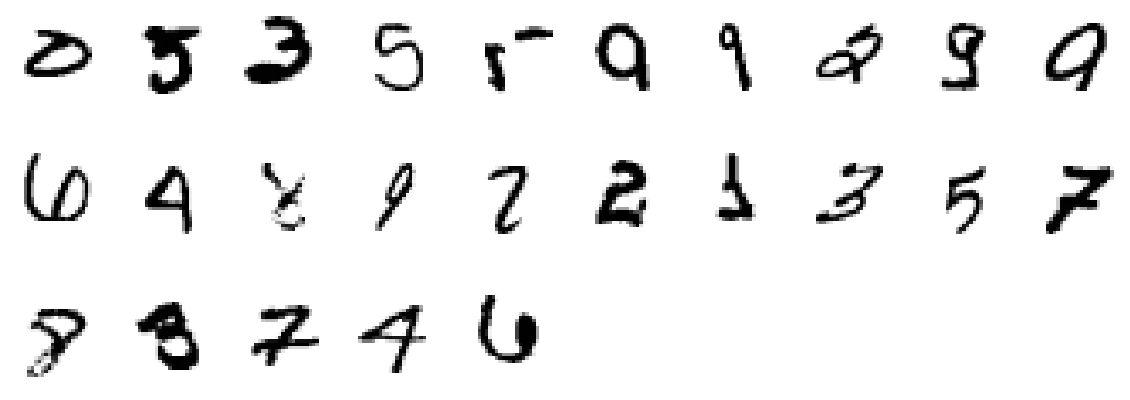

In [9]:



import misc
# len(testing.wht_correct_dict['img'])
misc.misclassified_images(testing.wht_correct_dict)

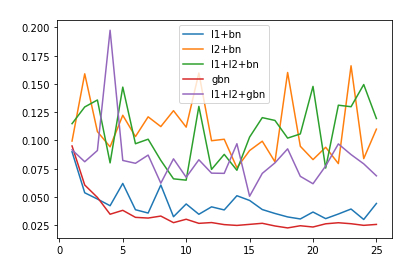

In [7]:
misc.validation_graph(loss_dict)

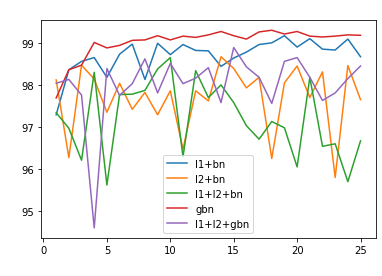

In [8]:
misc.accuracy_graph(testing.acc_dict)